In [1]:
# pull in dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets

import seaborn as sns

pd.options.display.max_columns = 200


In [16]:
#read in the CSV file
happyData = pd.read_csv('Data/Clean Data/HappynessCleanDataFinal.csv', index_col=False) 
happyData.head()

,Country,Region,Happiness2015,GDP2015,Freedom2015,Generosity2015,Year2015,Corruption2015,Happiness2016,GDP2016,Freedom2016,Generosity2016,Year2016,Corruption2016,Happiness2017,GDP2017,Freedom2017,Generosity2017,Year2017,Corruption2017,Happiness2018,GDP2018,Freedom2018,Generosity2018,Year2018,Corruption2018,Happiness2019,GDP2019,Freedom2019,Generosity2019,Year2019,Corruption2019,Happiness2020,GDP2020,Freedom2020,Generosity2020,Year2020,Corruption2020,Happiness2021,GDP2021,Freedom2021,Generosity2021,Year2021,Corruption2021
0,Switzerland,Western Europe,7.587,1.39651,0.66557,0.29678,2015,0.41978,7.509,1.52733,0.58557,0.28083,2016,0.41203,7.494,1.564980,0.620071,0.290549,2017,0.367007,7.487,1.420,0.660,0.256,2018,0.357,7.480,1.452,0.572,0.263,2019,0.343,7.5599,1.390774,0.921337,0.269056,2020,0.303728,7.571,1.566,0.919,0.204,2021,0.292
1,Iceland,Western Europe,7.561,1.30232,0.62877,0.43630,2015,0.14145,7.501,1.42666,0.56624,0.47678,2016,0.14975,7.504,1.480633,0.627163,0.475540,2017,0.153527,7.495,1.343,0.677,0.353,2018,0.138,7.494,1.380,0.591,0.354,2019,0.118,7.5045,1.326502,0.948892,0.362330,2020,0.711710,7.554,1.482,0.955,0.293,2021,0.673
2,Denmark,Western Europe,7.527,1.32548,0.64938,0.34139,2015,0.48357,7.526,1.44178,0.57941,0.36171,2016,0.44453,7.522,1.482383,0.626007,0.355280,2017,0.400770,7.555,1.351,0.683,0.284,2018,0.408,7.600,1.383,0.592,0.252,2019,0.410,7.6456,1.326949,0.951444,0.242793,2020,0.168489,7.620,1.502,0.946,0.208,2021,0.179
3,Norway,Western Europe,7.522,1.45900,0.66973,0.34699,2015,0.36503,7.498,1.57744,0.59609,0.37895,2016,0.35776,7.537,1.616463,0.635423,0.362012,2017,0.315964,7.594,1.456,0.686,0.286,2018,0.340,7.554,1.488,0.603,0.271,2019,0.341,7.4880,1.424207,0.955750,0.287985,2020,0.263218,7.392,1.543,0.960,0.249,2021,0.270
4,Canada,North America,7.427,1.32629,0.63297,0.45811,2015,0.32957,7.404,1.44015,0.57370,0.44834,2016,0.31329,7.316,1.479204,0.611101,0.435540,2017,0.287372,7.328,1.330,0.653,0.321,2018,0.291,7.278,1.365,0.584,0.285,2019,0.308,7.2321,1.301648,0.933913,0.281529,2020,0.390843,7.103,1.447,0.915,0.246,2021,0.415


In [69]:
#get the top 10 and the lowest 10 happiness scores
happiest = happyData.head(10)
saddest = happyData.tail(10)

#create common key so i can merge both dataframes
happiest['key'] = "happysad"
saddest['key'] = "happysad"

#stack the two dataframes together on the key i made
HappySad = pd.concat([happiest,saddest], ignore_index=True)
HappySad

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Country,Region,Happiness2015,GDP2015,Freedom2015,Generosity2015,Year2015,Corruption2015,Happiness2016,GDP2016,Freedom2016,Generosity2016,Year2016,Corruption2016,Happiness2017,GDP2017,Freedom2017,Generosity2017,Year2017,Corruption2017,Happiness2018,GDP2018,Freedom2018,Generosity2018,Year2018,Corruption2018,Happiness2019,GDP2019,Freedom2019,Generosity2019,Year2019,Corruption2019,Happiness2020,GDP2020,Freedom2020,Generosity2020,Year2020,Corruption2020,Happiness2021,GDP2021,Freedom2021,Generosity2021,Year2021,Corruption2021,key
0,Switzerland,Western Europe,7.587,1.39651,0.66557,0.29678,2015,0.41978,7.509,1.52733,0.58557,0.28083,2016,0.41203,7.494,1.564980,0.620071,0.290549,2017,0.367007,7.487,1.420,0.660,0.256,2018,0.357,7.480,1.452,0.572,0.263,2019,0.343,7.5599,1.390774,0.921337,0.269056,2020,0.303728,7.571,1.566,0.919,0.204,2021,0.292,happysad
1,Iceland,Western Europe,7.561,1.30232,0.62877,0.43630,2015,0.14145,7.501,1.42666,0.56624,0.47678,2016,0.14975,7.504,1.480633,0.627163,0.475540,2017,0.153527,7.495,1.343,0.677,0.353,2018,0.138,7.494,1.380,0.591,0.354,2019,0.118,7.5045,1.326502,0.948892,0.362330,2020,0.711710,7.554,1.482,0.955,0.293,2021,0.673,happysad
2,Denmark,Western Europe,7.527,1.32548,0.64938,0.34139,2015,0.48357,7.526,1.44178,0.57941,0.36171,2016,0.44453,7.522,1.482383,0.626007,0.355280,2017,0.400770,7.555,1.351,0.683,0.284,2018,0.408,7.600,1.383,0.592,0.252,2019,0.410,7.6456,1.326949,0.951444,0.242793,2020,0.168489,7.620,1.502,0.946,0.208,2021,0.179,happysad
3,Norway,Western Europe,7.522,1.45900,0.66973,0.34699,2015,0.36503,7.498,1.57744,0.59609,0.37895,2016,0.35776,7.537,1.616463,0.635423,0.362012,2017,0.315964,7.594,1.456,0.686,0.286,2018,0.340,7.554,1.488,0.603,0.271,2019,0.341,7.4880,1.424207,0.955750,0.287985,2020,0.263218,7.392,1.543,0.960,0.249,2021,0.270,happysad
4,Canada,North America,7.427,1.32629,0.63297,0.45811,2015,0.32957,7.404,1.44015,0.57370,0.44834,2016,0.31329,7.316,1.479204,0.611101,0.435540,2017,0.287372,7.328,1.330,0.653,0.321,2018,0.291,7.278,1.365,0.584,0.285,2019,0.308,7.2321,1.301648,0.933913,0.281529,2020,0.390843,7.103,1.447,0.915,0.246,2021,0.415,happysad
5,Finland,Western Europe,7.406,1.29025,0.64169,0.23351,2015,0.41372,7.413,1.40598,0.57104,0.25492,2016,0.41004,7.469,1.443572,0.617951,0.245483,2017,0.382612,7.632,1.305,0.681,0.202,2018,0.393,7.769,1.340,0.596,0.153,2019,0.393,7.8087,1.285190,0.949172,0.159670,2020,0.195445,7.842,1.446,0.949,0.124,2021,0.186,happysad
6,Netherlands,Western Europe,7.378,1.32944,0.61576,0.47610,2015,0.31814,7.339,1.46468,0.55211,0.47416,2016,0.29927,7.377,1.503945,0.585384,0.470490,2017,0.282662,7.441,1.361,0.638,0.333,2018,0.295,7.488,1.396,0.557,0.322,2019,0.298,7.4489,1.338946,0.908548,0.336318,2020,0.364717,7.464,1.501,0.913,0.302,2021,0.338,happysad
7,Sweden,Western Europe,7.364,1.33171,0.65980,0.36262,2015,0.43844,7.291,1.45181,0.58218,0.38254,2016,0.40867,7.284,1.494387,0.612924,0.385399,2017,0.384399,7.314,1.355,0.659,0.285,2018,0.383,7.343,1.387,0.574,0.267,2019,0.373,7.3535,1.322235,0.939144,0.272828,2020,0.250880,7.363,1.478,0.945,0.244,2021,0.237,happysad
8,New Zealand,Australia and New Zealand,7.286,1.25018,0.63938,0.47501,2015,0.42922,7.334,1.36066,0.58147,0.49401,2016,0.41904,7.314,1.405706,0.614062,0.500005,2017,0.382817,7.324,1.268,0.669,0.365,2018,0.389,7.307,1.303,0.585,0.330,2019,0.380,7.2996,1.242318,0.936217,0.325726,2020,0.221139,7.277,1.400,0.929,0.276,2021,0.242,happysad
9,Australia,Australia and New Zealand,7.284,1.33358,0.65124,0.43562,2015,0.35637,7.313,1.44443,0.56837,0.47407,2016,0.32331,7.284,1.484415,0.601607,0.477699,2017,0.301184,7.272,1.340,0.647,0.361,2018,0.302,7.228,1.372,0.557,0.332,2019,0.290,7.2228,1.310396,0.915432,0.324974,2020,0.415169,7.183,1.453,0.914,0.291,2021,0.442,happysad


In [71]:
#get the average Happiness for every country from all the years
happyYears = happyData[['Country','Happiness2015','Happiness2016','Happiness2017','Happiness2018','Happiness2019','Happiness2020','Happiness2021']]
happyYearsAVG = happyYears.iloc[:, 1:].astype(float).mean(axis=1)
happyYears['Avg_Happiness'] = happyYearsAVG

#get the average Happiness for Happiest/Saddest countries from all the years
happySadHappiness = HappySad[['Country','Happiness2015','Happiness2016','Happiness2017','Happiness2018','Happiness2019','Happiness2020','Happiness2021']]
happySadAVG = happySadHappiness.iloc[:, 1:].astype(float).mean(axis=1)
happySadHappiness['Avg_HappySadHappiness'] = happySadAVG

#get the average Generosity for every country from all the years
generosity = happyData[['Country','Generosity2015','Generosity2016','Generosity2017','Generosity2018','Generosity2019','Generosity2020','Generosity2021']]
generosityAVG = generosity.iloc[:, 1:].astype(float).mean(axis=1)
generosity['Avg_Generosity'] = generosityAVG

#get the average Generosity for Happiest/Saddest countries from all the years
happySadGen = HappySad[['Country','Generosity2015','Generosity2016','Generosity2017','Generosity2018','Generosity2019','Generosity2020','Generosity2021']]
happySadGenAVG = happySadGen.iloc[:, 1:].astype(float).mean(axis=1)
happySadGen['Avg_HappySadGenerosity'] = happySadGenAVG


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

Text(0, 0.5, 'Average Happiness')

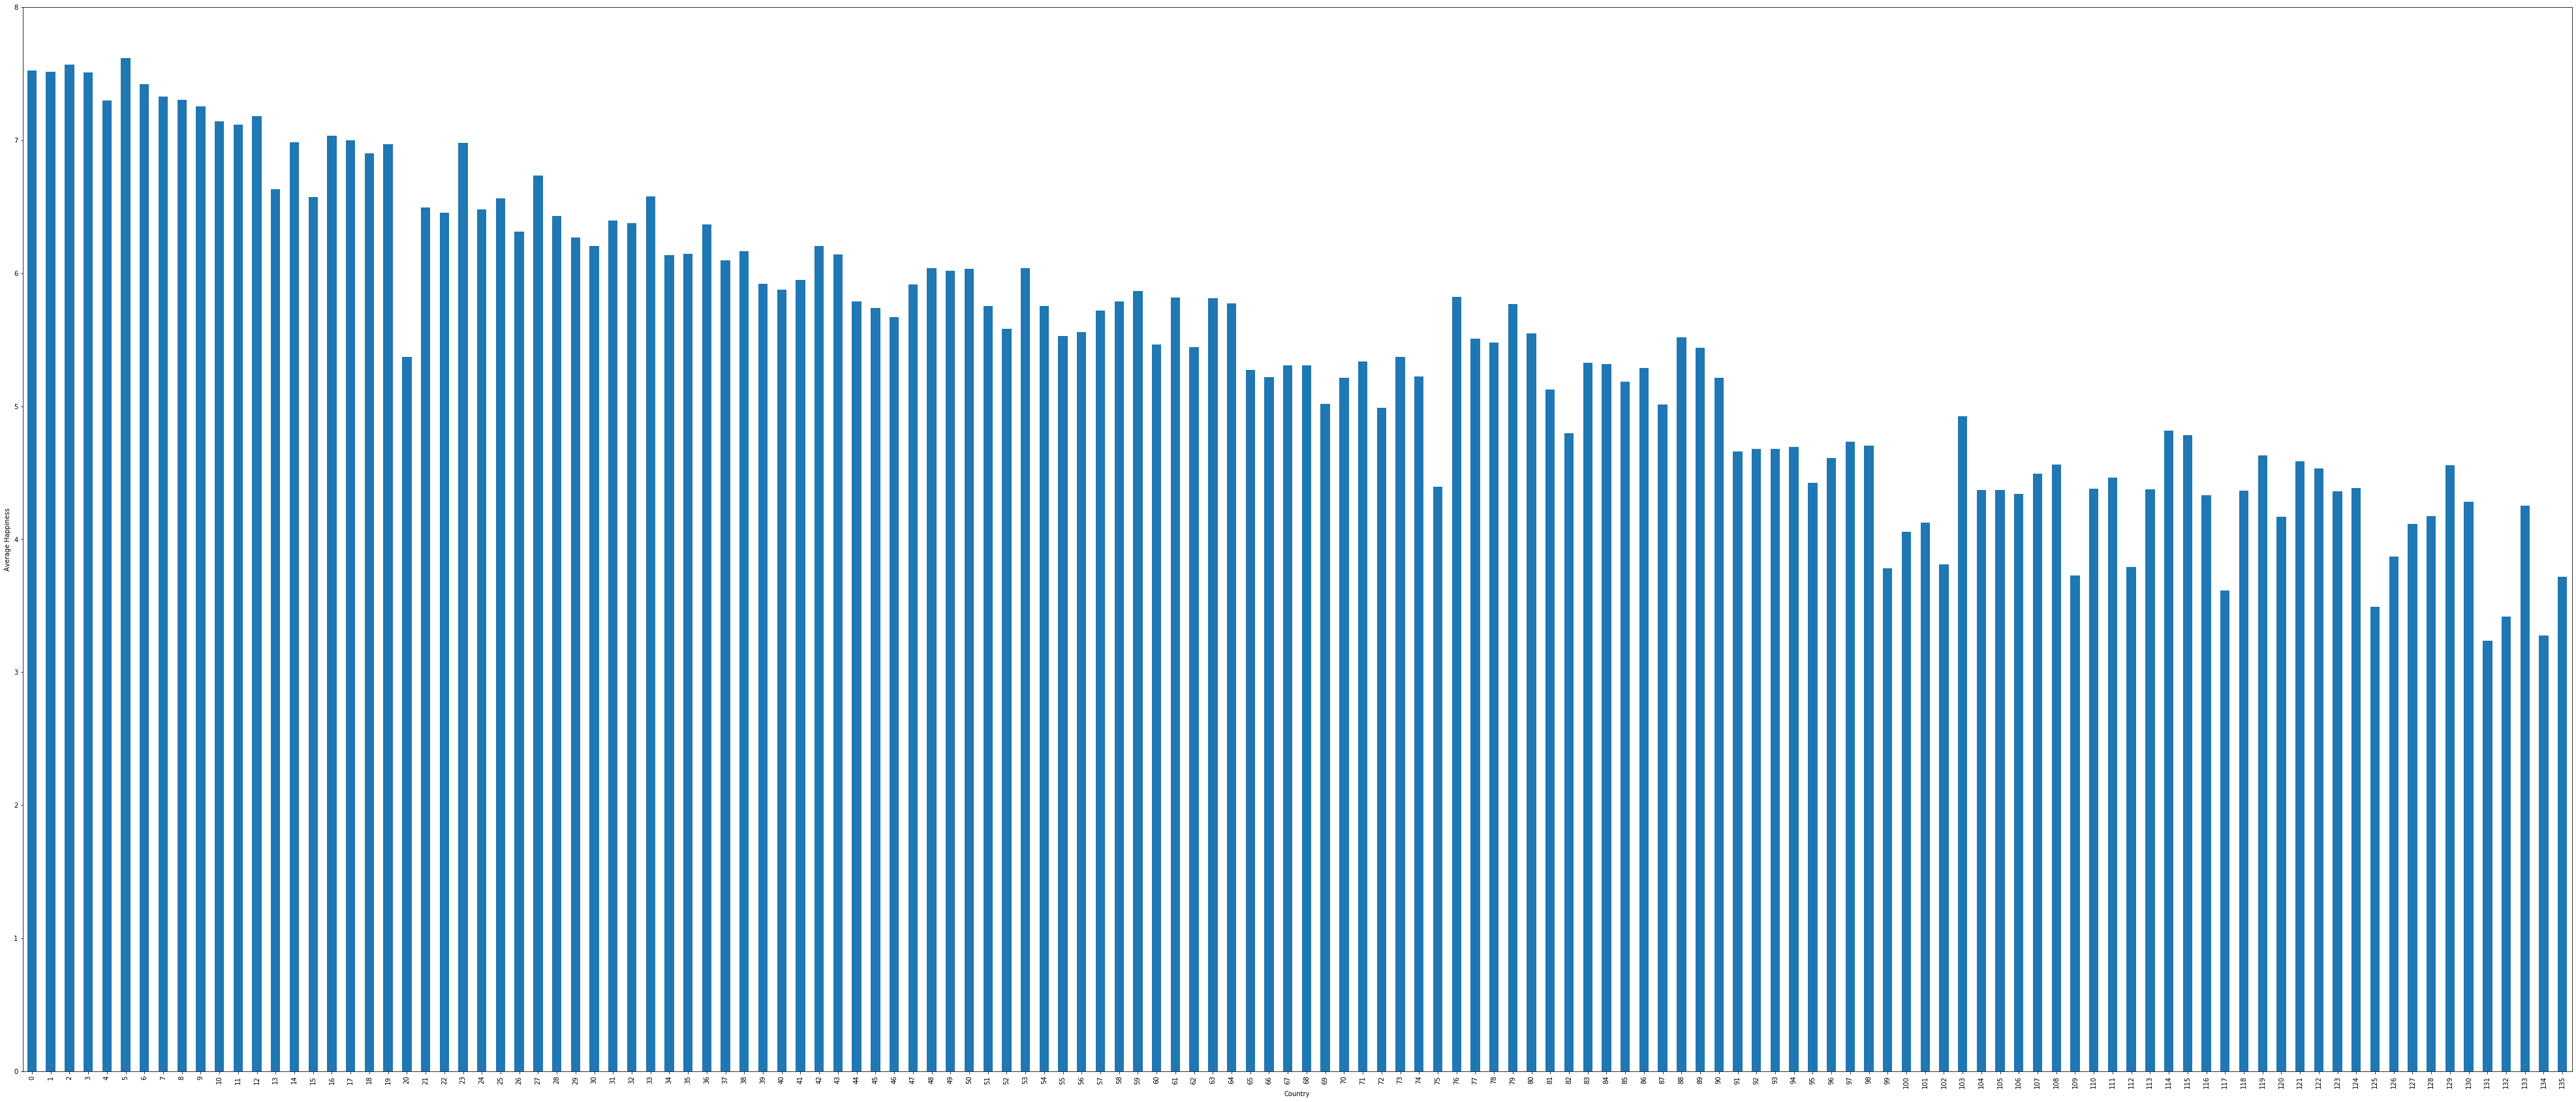

In [53]:
axis = happyYearsAVG.plot(kind='bar', figsize=(70,30) )
#define the X label as the Drug Regimen
axis.set_xlabel('Country')
#define the Y label as the count of drugs
axis.set_ylabel('Average Happiness')


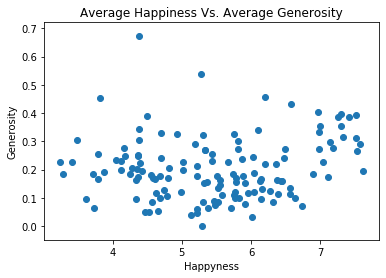

In [48]:
#get the average for x and y axis
x_axis = happyYears['Avg_Happiness']
y_axis = generosity['Avg_Generosity']

#Set plot points and plot the scatter
plt.title('Average Happiness Vs. Average Generosity')
plt.xlabel('Happyness')
plt.ylabel('Generosity')
plt.scatter(x_axis,y_axis)


### Checking to see if countries that have a higher happiness score are more generous then those countries that have the lowest happiness scores

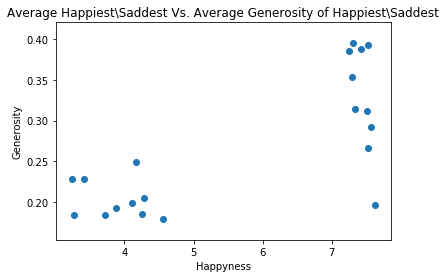

In [73]:
#get the average for x and y axis
x_axis = happySadHappiness['Avg_HappySadHappiness']
y_axis = happySadGen['Avg_HappySadGenerosity']

#Set plot points and plot the scatter
plt.title('Average Happiest\Saddest Vs. Average Generosity of Happiest\Saddest')
plt.xlabel('Happyness')
plt.ylabel('Generosity')
plt.scatter(x_axis,y_axis)


In [ ]:
# Rename our _x columns to "2013 Wins", "2013 Losses", and "2013 Draws"
combined_years = df1516.rename(columns={"Year_x":"Year","Happiness Score_x":"2015Happiness","GDP_x":"2015GDP", 
                                "Generosity_x": "2015Generosity"})

# Rename our _y columns to "2014 Wins", "2014 Losses", and "2014 Draws"
combined_years = df1516.rename(columns={"Year_y":"Year","Happiness Score_y":"2016Happiness","GDP_y":"2016GDP", 
                                "Generosity_y":"2016Generosity"})

combined_years.head()

In [ ]:
combined_years = pd.merge(combined_years,y_2017, how='outer', on='Country')
combined_years

In [ ]:
combined_years = combined_years.rename(columns={"Year_y":"Year","Happiness Score_x":"2017Happiness","GDP_y":"2016GDP", 
                                "Generosity_x":"2017Generosity"})

In [ ]:
combined_years.to_csv(r'../HappynessYearsMerged.csv')

In [ ]:
west=plt.plot(y_2015.loc[y_2015['Region']=='Western Europe']['Happiness Score'],y_2015.loc[y_2015['Region']=='Western Europe']['Generosity'],color="yellow",label="Western Europe")
sub=plt.plot(y_2015.loc[y_2015['Region']=='Sub-Saharan Africa']['Happiness Score'],y_2015.loc[y_2015['Region']=='Sub-Saharan Africa']['Generosity'],color="green",label="Western Europe")# titles and labels
plt.title("Annual Hours Worked Since 1950")
plt.xlabel("Year")
plt.ylabel("Annual Hours Worked")
# places legend outside plot
plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.grid()
plt.show()